In [ ]:
!git clone https://github.com/meenakothandam/GITHUBMEENA.git

Cloning into 'GITHUBMEENA'...


In [ ]:
!pip install pandas scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tweepy

In [ ]:
!pip install TextBlob

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
!pip install wordcloud
!pip install sentiment charts

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the dataset
file_path = '/content/sentiment_analysis.csv'
df = pd.read_csv(file_path)

Data Overview


In [ ]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


Data Cleaning

In [ ]:
# Load the dataset
file_path = '/content/sentiment_analysis.csv'
df = pd.read_csv(file_path)

# Get the actual column names
print(df.columns)

# ... (rest of your code) ...

# Now you can use the actual column names to drop them
# For example, if the actual column names are 'Unnamed: 0.1' and 'Unnamed: 0.2':
# df.drop(columns=df.columns[df.columns.str.contains('Unnamed')], inplace=True)

df['sentiment'] = df['sentiment'].str.strip()
df['Platform'] = df['Platform'].str.strip().str.capitalize()

# Check for missing values
df.isnull().sum()

Index(['Year', 'Month', 'Day', 'Time of Tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')


,0
Year,0
Month,0
Day,0
Time of Tweet,0
text,0
sentiment,0
Platform,0


Exploratory Data Analysis

Sentiment Distribution, only the top 20 most used sentiments for improve the visualization

<ipython-input-33-8d7db1c18d58>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sentiments.index, x=top_sentiments.values, palette="coolwarm")


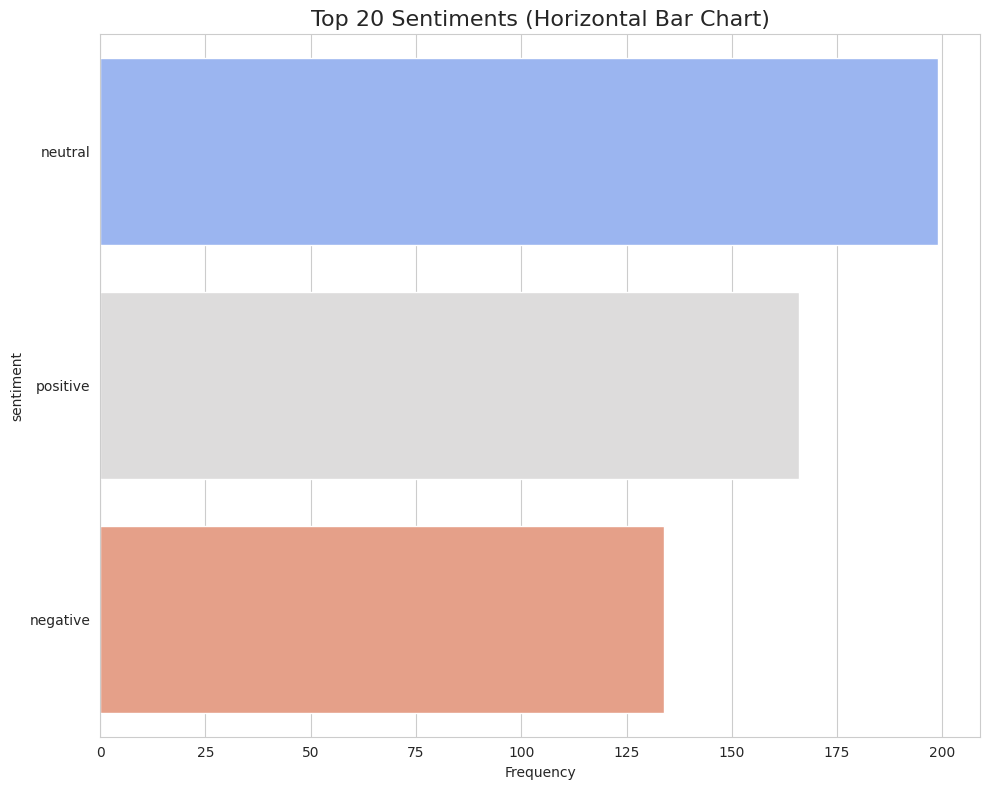

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 20 sentiments and their counts
top_sentiments = filtered_df["sentiment"].value_counts().nlargest(20)

# Horizontal version of the bar chart
plt.figure(figsize=(10, 8))
sns.barplot(y=top_sentiments.index, x=top_sentiments.values, palette="coolwarm")
plt.title("Top 20 Sentiments (Horizontal Bar Chart)", fontsize=16)
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()


Post by platform

<ipython-input-34-432d426e5902>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Platform"], palette="pastel")


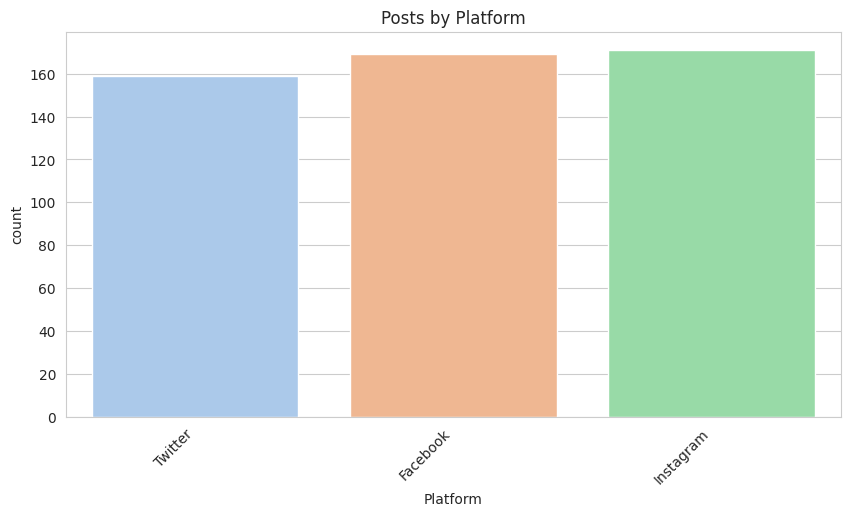

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(x=df["Platform"], palette="pastel")
plt.title("Posts by Platform")
plt.xticks(rotation=45, ha="right")

plt.show()

In [ ]:
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
!pip install dash pandas scikit-learn plotly

In [1]:
# --- Import Libraries ---
import pandas as pd
import re
from dash import Dash, dcc, html, Input, Output, State
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# --- Clean Text Function ---
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

# --- Load Dataset ---
try:
    data = pd.read_csv('/content/sentiment_analysis.csv')
    data.dropna(subset=['text', 'sentiment'], inplace=True)
    data = data[data['sentiment'].apply(lambda x: isinstance(x, str))]
    data['clean_text'] = data['text'].apply(clean_text)
except Exception as e:
    print("Error loading dataset:", e)
    exit()

# --- Train Model ---
X = data['clean_text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# --- Emoji Dictionary ---
emoji_map = {
    "happy": "😊 You're spreading joy!",
    "sad": "😢 It's okay to feel down sometimes.",
    "angry": "😠 Take a breath, stay calm.",
    "surprise": "😲 Didn't see that coming!",
    "love": "❤️ Love is in the air!",
    "fear": "😨 It's okay to be scared.",
    "neutral": "😐 Stay balanced."
}

# --- Dash App ---
app = Dash(__name__)
server = app.server  # for deployment (optional)

# Emotion distribution plot
emotion_counts = data['sentiment'].value_counts().reset_index()
emotion_counts.columns = ['emotion', 'count']
fig = px.bar(emotion_counts, x='emotion', y='count', title='Emotion Distribution', color='emotion')

# --- App Layout ---
app.layout = html.Div([
    html.H1("🎭 Emotion Detection Dashboard"),

    dcc.Graph(id='emotion-bar', figure=fig),
    html.Div(id='emoji-message', style={'fontSize': 24, 'paddingTop': 20, 'color': 'blue'}),

    html.Hr(),
    html.H3("🔍 Predict Emotion from Text"),
    dcc.Input(id='user-text', type='text', placeholder='Type your sentence here...', style={'width': '60%'}),
    html.Button('Predict Emotion', id='predict-btn', n_clicks=0),
    html.Div(id='predicted-emotion', style={'fontSize': 20, 'marginTop': 10}),
    html.Div(id='predicted-emoji', style={'fontSize': 40, 'marginTop': 5})
])

# --- Callback 1: Bar Click to Emoji ---
@app.callback(
    Output('emoji-message', 'children'),
    Input('emotion-bar', 'clickData')
)
def show_emoji_from_bar(clickData):
    if clickData:
        emotion = clickData['points'][0]['x']
        return emoji_map.get(emotion.lower(), "🤖 No emoji for this emotion.")
    return "Click on a bar to view the emotion message."

# --- Callback 2: Predict Emotion from User Input ---
@app.callback(
    Output('predicted-emotion', 'children'),
    Output('predicted-emoji', 'children'),
    Input('predict-btn', 'n_clicks'),
    State('user-text', 'value')
)
def predict_emotion(n_clicks, text):
    if n_clicks > 0 and text:
        cleaned = clean_text(text)
        vec = vectorizer.transform([cleaned])
        prediction = model.predict(vec)[0]
        emoji = emoji_map.get(prediction.lower(), "🤖")
        return f"Predicted Emotion: {prediction}", emoji
    return "", ""

# --- Run App ---
if __name__ == '__main__':
    app.run(debug=True)



<IPython.core.display.Javascript object>